# kmeans

In [1]:
import numpy as np
x = [1,2,5,8,7,4,5]
y = [2,4,8,9,10,2,3]

In [2]:
import matplotlib.pyplot as plt

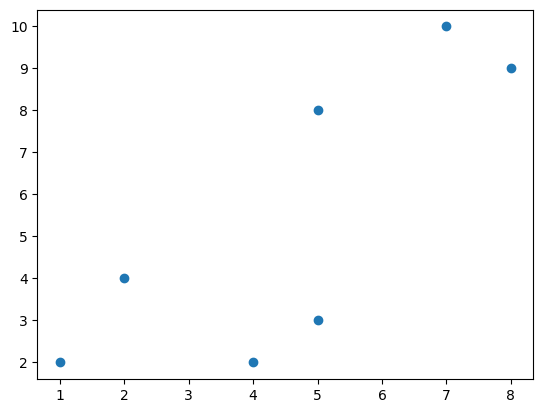

In [3]:
plt.scatter(x,y)

# k number of clusters = 2

# chosing random point as centers

In [4]:
import random as rd
def get_rand_n_cluster(n_clusters,size):
    centers_ = []
    centers_.append(rd.randint(0,size-1))
    while len(centers_)< n_clusters:
        rand_index = rd.randint(0,size-1)
        if rand_index not in centers_:
            centers_.append(rand_index)
    return centers_

# calculating squared Euclidean distance

# distnace between A(x1,y1) and B(x2,y2) is (x2-x1)^2 + (y2-y1)^2 

In [5]:
def calc_dist(x,y,x1,y1):
    x_diff = np.array(x)-x1
    y_diff = np.array(y)- y1
    x_diff = x_diff**2
    y_diff = y_diff**2
    return x_diff+y_diff

In [6]:
centers = get_rand_n_cluster(3,len(x))
print(centers)

[2, 0, 4]


In [7]:
def clc_dist_to_center(centers,x,y,centers_points=None):
    res_ = []
    if centers is not None:
        for i in range(len(centers)):
            res = calc_dist(x, y , x[centers[i]],y[centers[i]])
            res_.append(res)
    else:
        for xx,yy in centers_points:
            res = calc_dist(x, y , xx,yy)
            res_.append(res) 
    return res_

In [8]:
res_ = clc_dist_to_center(centers,x,y)
print(res_)

[array([52, 25,  0, 10,  8, 37, 25]), array([  0,   5,  52,  98, 100,   9,  17]), array([100,  61,   8,   2,   0,  73,  53])]


# evaluating the class of the point

In [9]:
def eval_class(x_or_y,res_):
    class_ = []
    for i in range(0,len(x)):
        min_dist = min([elem[i] for elem in res_])
        for indx , element in enumerate(res_):
            if element[i] == min_dist:
                class_.append(indx)
                break
    return class_

In [10]:
class_ =  eval_class(x,res_)
print(class_)

[1, 1, 0, 2, 2, 1, 1]


# ploting the result

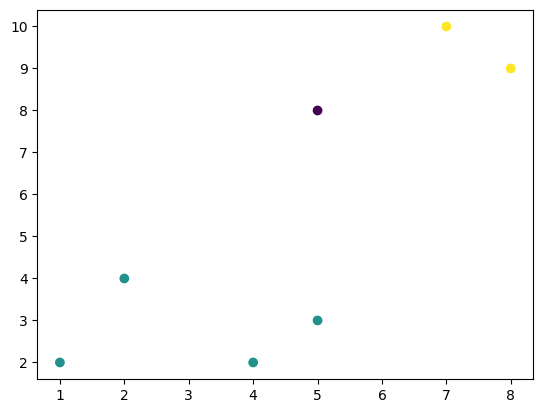

In [11]:
plt.scatter(x,y,c=class_)

# claculating the new centers

In [12]:
import pandas as pd
def get_center_points(x,y,class_):
    res = np.vstack([np.array(x),np.array(y),np.array(class_)])
    res = res.T
    df =  pd.DataFrame(data=res , columns  = ["x","y","class"])
    classes = list(df.drop_duplicates(["class"])["class"])
    center_points = []
    for clas in classes:
        x_ = df[df["class"] == clas]["x"]
        x_center = x_.sum()/len(x_)
        y_ = df[df["class"] == clas]["y"]
        y_center = y_.sum()/len(y_)
        center_points.append( (x_center,y_center) )
    return center_points

In [13]:
centers = get_center_points(x,y,class_)
print(centers)

[(3.0, 2.75), (5.0, 8.0), (7.5, 9.5)]


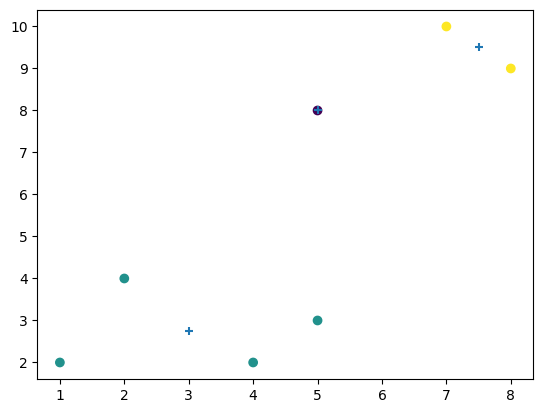

In [14]:
plt.scatter(x,y,c=class_)
plt.scatter(np.array([i[0] for i in centers]),np.array([i[1] for i in centers]) , marker="+")

In [15]:
n_itter = 5

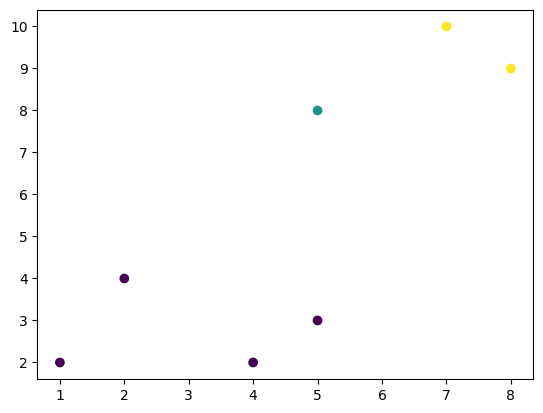

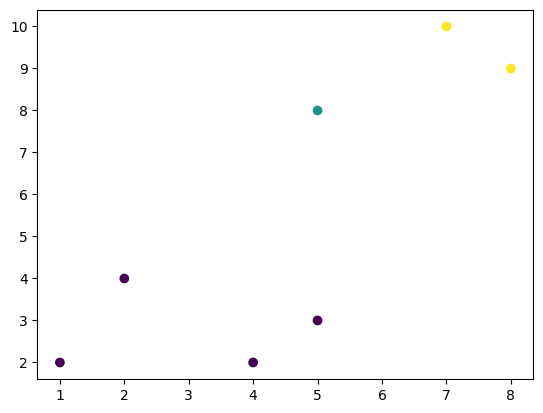

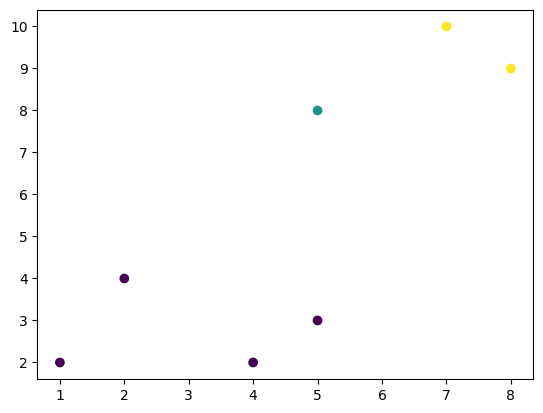

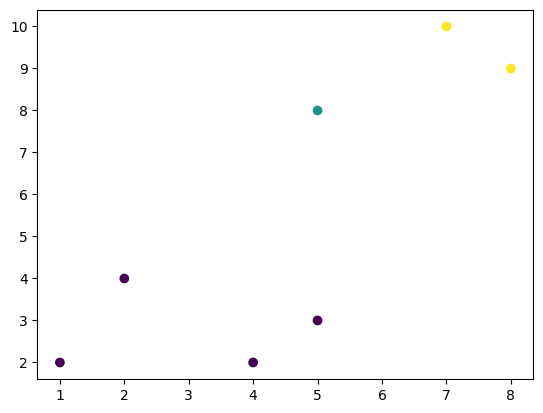

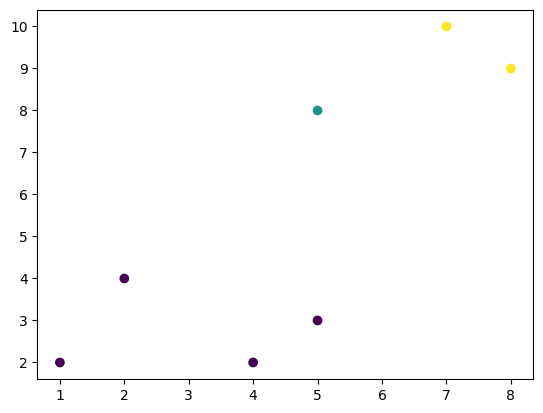

In [16]:
for i in range(n_itter):
    res_ = clc_dist_to_center(None,x,y,centers)
    class_ = eval_class(x,res_)
    plt.scatter(x,y,c=class_)
    plt.show()
    centers = get_center_points(x,y,class_)